In [ ]:
!pip install wandb
import wandb
wandb.login()
from wandb.keras import WandbCallback, WandbModelCheckpoint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/',force_remount=True)

# Importing the necessary

# EDA (generating a correlation image)

In [ ]:
#df_stonks = pd.read_csv('/content/drive/MyDrive/Stonks/1m_open.csv')
file_id = '1lG0YGI-MQQzyu-4_CmanTIc_wnna6JRw'
output = '1m_open.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
df_stonks = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1lG0YGI-MQQzyu-4_CmanTIc_wnna6JRw
To: /content/1m_open.csv
100%|██████████| 578M/578M [00:03<00:00, 182MB/s]


In [ ]:
df_stonks.iloc[200000:210000]

,Date,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,AMAT,AMGN,...,DOCU,ZM,DXCM,PDD,MRNA,AEP,MTCH,OKTA,TEAM,KDP
200000,2018-01-18 10:56:00,58.260,44.89,194.6500,97.770,121.2800,113.4200,65.2500,58.000,186.6100,...,38.0,65.0,14.03,26.6,22.0,67.7200,31.1100,26.9800,54.7200,95.4500
200001,2018-01-18 10:57:00,58.230,44.86,194.6200,97.650,121.2202,113.4200,65.2200,57.950,186.8000,...,38.0,65.0,14.02,26.6,22.0,67.7700,31.1300,26.9300,54.5000,95.4300
200002,2018-01-18 10:58:00,58.235,44.86,194.6625,97.640,121.1750,113.3500,65.1400,57.965,186.7900,...,38.0,65.0,14.04,26.6,22.0,67.7923,31.1300,26.8900,54.5891,95.3625
200003,2018-01-18 10:59:00,58.230,44.85,194.5400,97.620,121.1700,113.3200,65.1401,57.970,186.8000,...,38.0,65.0,14.04,26.6,22.0,67.7900,31.0600,26.8500,54.5100,95.3625
200004,2018-01-18 11:00:00,58.140,44.79,194.4400,97.600,121.2200,113.2500,65.1350,57.895,186.7972,...,38.0,65.0,14.03,26.6,22.0,67.8100,31.0763,26.8300,54.3300,95.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,2018-02-23 15:12:00,53.290,43.75,208.3200,90.160,117.0600,114.5000,67.0500,56.910,185.5300,...,38.0,65.0,14.06,26.6,22.0,67.1000,41.8800,36.6616,52.9700,115.4050
209996,2018-02-23 15:13:00,53.290,43.78,208.4100,90.215,117.0800,114.5114,67.0700,56.920,185.6700,...,38.0,65.0,14.05,26.6,22.0,67.0800,41.8650,36.6300,52.9878,115.3900
209997,2018-02-23 15:14:00,53.290,43.78,208.3900,90.230,117.0900,114.5900,67.0500,56.950,185.6100,...,38.0,65.0,14.05,26.6,22.0,67.0633,41.8800,36.6200,53.0100,115.3600
209998,2018-02-23 15:15:00,53.260,43.78,208.3700,90.240,117.1000,114.6100,67.0700,56.930,185.7100,...,38.0,65.0,14.04,26.6,22.0,67.0600,41.8600,36.6000,53.0100,115.3650


In [ ]:
stonk_names = np.array(df_stonks.columns[1:])
# the standard deviation in percentage changes
stonk_std = np.zeros(len(stonk_names))

In [ ]:
for i,stonk in enumerate(stonk_names):
  #percentage change in a stonk
  stonk_delta = (np.array(df_stonks[stonk])-np.roll(np.array(df_stonks[stonk]),1))/np.array(df_stonks[stonk])
  #overall std of percentage changes of the stonk
  stonk_std[i] = np.std(stonk_delta)
  #rewrite df_stonks with sigma deviation
  df_stonks[stonk] = stonk_delta/stonk_std[i]

In [ ]:
df_stonks.drop([0],inplace = True)

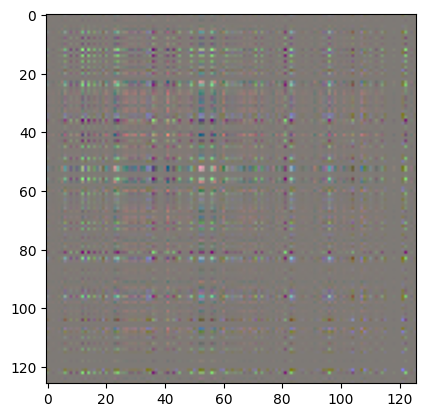

In [ ]:
idx = 50000
image = np.stack([generate_frame(df_stonks.iloc[idx][1:],stonk_names),
                  generate_frame(df_stonks.iloc[idx+1][1:],stonk_names),
                  generate_frame(df_stonks.iloc[idx+2][1:],stonk_names)]).T
plt.imshow(image)

# Tensorflow Training Pipeline

### Converting df to a tensor

In [ ]:
df_stonk_tensor = tf.convert_to_tensor(df_stonks[stonk_names])

### Defining tf functions to generate image of previous 3 min data

In [ ]:
batch_size = 32
train = tf.data.Dataset.from_tensor_slices((range(4,100000)))
val = tf.data.Dataset.from_tensor_slices((range(100000,110000)))


train = train.map(generate_image_tf, num_parallel_calls=1)## Setting this to 1. AUTOTUNE freezing computation
train = train.batch(batch_size)
#train_unet = train_unet.prefetch(tf.data.AUTOTUNE)

val = val.map(generate_image_tf, num_parallel_calls=1)## Setting this to 1. AUTOTUNE freezing computation
val = val.batch(batch_size)

In [ ]:
for el in val.take(0):
  print(el)
  plt.imshow((el[0][3]).numpy())

### EfficientNet model

In [ ]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

batch_size = 32

size = 126

IMG_SIZE = (size,size)


### Training tfrecords pipeline

In [ ]:
batch_size = 32
train = tf.data.Dataset.from_tensor_slices((range(4,100000)))
val = tf.data.Dataset.from_tensor_slices((range(100000,110000)))


train = train.map(generate_image_tf, num_parallel_calls=1)## Setting this to 1. AUTOTUNE freezing computation
train = train.batch(batch_size)
#train_unet = train_unet.prefetch(tf.data.AUTOTUNE)

val = val.map(generate_image_tf, num_parallel_calls=1)## Setting this to 1. AUTOTUNE freezing computation
val = val.batch(batch_size)

In [ ]:
train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 126, 126, 3), dtype=tf.float64, name=None), (TensorSpec(shape=(None,), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None)))>

In [ ]:
stonk_classifier = G2_classifier(image_shape=(size,size))
stonk_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=[tf.keras.losses.BinaryCrossentropy(), tf.keras.losses.MeanAbsoluteError()],
              loss_weights = [1, 0],
              metrics=['AUC','accuracy'])


258076736/258076736 [==============================] - 13s 0us/step


In [ ]:
# stonk_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['AUC','accuracy'])

In [ ]:
# # Trained total for 8 epochs
stonk_classifier.fit(x = train,validation_data=val,epochs = 5)

Epoch 1/5
3125/3125 [==============================] - 585s 176ms/step - loss: 0.6461 - dense_3_loss: 0.6461 - dense_3_1_loss: 0.3217 - dense_3_auc: 0.5217 - dense_3_accuracy: 0.6663 - dense_3_1_auc_1: 0.5381 - dense_3_1_accuracy: 0.3536 - val_loss: 0.5792 - val_dense_3_loss: 0.5792 - val_dense_3_1_loss: 0.2630 - val_dense_3_auc: 0.5615 - val_dense_3_accuracy: 0.7315 - val_dense_3_1_auc_1: 0.5932 - val_dense_3_1_accuracy: 0.4779
Epoch 2/5
3125/3125 [==============================] - 487s 156ms/step - loss: 0.6428 - dense_3_loss: 0.6428 - dense_3_1_loss: 0.3208 - dense_3_auc: 0.5249 - dense_3_accuracy: 0.6702 - dense_3_1_auc_1: 0.5459 - dense_3_1_accuracy: 0.3576 - val_loss: 0.5787 - val_dense_3_loss: 0.5787 - val_dense_3_1_loss: 0.2739 - val_dense_3_auc: 0.5633 - val_dense_3_accuracy: 0.7311 - val_dense_3_1_auc_1: 0.5936 - val_dense_3_1_accuracy: 0.4774
Epoch 3/5
3125/3125 [==============================] - 490s 157ms/step - loss: 0.6420 - dense_3_loss: 0.6420 - dense_3_1_loss: 0.3206 

In [ ]:
# predict = stonk_classifier.predict(val)

157/157 [==============================] - 26s 131ms/step


wandb: Currently logged in as: aghalsa. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING When using `save_best_only`, ensure that the `filepath` argument contains formatting placeholders like `{epoch:02d}` or `{batch:02d}`. This ensures correct interpretation of the logged artifacts.


258076736/258076736 [==============================] - 9s 0us/step


wandb: WARNING WandbCallback is unable to read validation_data from trainer and therefore cannot log validation data. Ensure Keras is properly patched by calling `from wandb.keras import WandbCallback` at the top of your script.


Epoch 1/30
3125/3125 [==============================] - ETA: 0s - loss: 0.6369 - dense_loss: 0.6369 - dense_1_loss: 0.3194 - dense_auc: 0.5146 - dense_accuracy: 0.6768 - dense_precision: 0.3521 - dense_1_auc_1: 0.5313 - dense_1_accuracy: 0.3654 - dense_1_precision_1: 0.7116

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3125/3125 [==============================] - 493s 148ms/step - loss: 0.6369 - dense_loss: 0.6369 - dense_1_loss: 0.3194 - dense_auc: 0.5146 - dense_accuracy: 0.6768 - dense_precision: 0.3521 - dense_1_auc_1: 0.5313 - dense_1_accuracy: 0.3654 - dense_1_precision_1: 0.7116 - val_loss: 0.5838 - val_dense_loss: 0.5838 - val_dense_1_loss: 0.2694 - val_dense_auc: 0.5061 - val_dense_accuracy: 0.7293 - val_dense_precision: 0.0000e+00 - val_dense_1_auc_1: 0.5056 - val_dense_1_accuracy: 0.4781 - val_dense_1_precision_1: 0.0000e+00
Epoch 2/30
3125/3125 [==============================] - 458s 146ms/step - loss: 0.6333 - dense_loss: 0.6333 - dense_1_loss: 0.3208 - dense_auc: 0.5237 - dense_accuracy: 0.6782 - dense_precision: 0.3675 - dense_1_auc_1: 0.5439 - dense_1_accuracy: 0.3659 - dense_1_precision_1: 0.7088 - val_loss: 0.5834 - val_dense_loss: 0.5834 - val_dense_1_loss: 0.2715 - val_dense_auc: 0.5344 - val_dense_accuracy: 0.7293 - val_dense_precision: 0.0000e+00 - val_dense_1_auc_1: 0.5465 - va

<ipython-input-15-84c8743889bf>:135: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  price_changes = np.concatenate(np.array(price_changes))


accuracy,▁
auc,▁
dense_1_accuracy,▄█▇▅▂█▇▅▅▂█▆▃██▅▅▁█▇▄██▆▆▃█▇▅▁█▆▆▄██▅▂██
dense_1_auc_1,▃▄▆▄▄▅▆▅▅▁▆▅▅▆▇▅▅▄▆▇▆▆▇▇▆▆▇█▆▅▇▇▇▆▇█▇▅▇█
dense_1_loss,▅▁▂▄▇▁▂▄▅▃▁▃▆▁▁▄▄█▁▂▅▁▁▃▄▇▁▂▄▇▁▃▃▆▁▁▄█▁▁
dense_1_precision_1,▇▇▇▇▇▇▇▇▇▁▇▇▇▇█▇▇███████████████████████
dense_accuracy,▃▇▇▅▁▇▇▄▄█▇▆▃▇▇▅▅▁▇▆▄█▇▅▅▂▇▇▄▁▇▆▆▃█▇▅▁▇▇
dense_auc,▁▂▂▂▁▂▃▂▂█▃▂▂▃▃▂▂▁▃▃▂▃▃▃▂▂▃▃▂▁▃▃▃▂▃▃▃▁▃▃
dense_loss,█▄▄▆█▄▄▆▆▁▄▅▇▃▃▆▆█▃▄▆▃▃▅▅▇▃▃▆█▃▄▅▆▃▃▅▇▃▃
dense_precision,▇▆▇▇▇▇▇▇▇▁▇▇▇▇█▇▇█▇▇███▇███▇▇▇██▇▇███▇██
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███


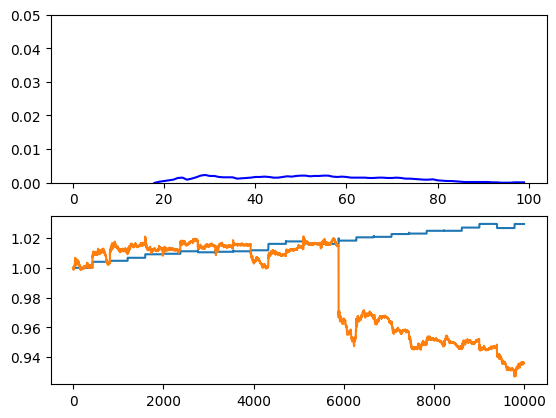

In [ ]:
configs = dict(
    batch_size = 32,
    model_name = 'effnetb7',
    epochs = 30,
    init_learning_rate = 0.3*0.0001,
    itrain = 4,
    ntrain = 100000,
    shuffle=True,
    train_all = False,
    loss_fn = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['AUC','accuracy','Precision']

)
run = wandb.init(project='stonks_effnet_nsize', config=configs, job_type='train',settings=wandb.Settings(init_timeout=300))
config = wandb.config


# Define WandbCallback for experiment tracking
wandb_callback = WandbCallback(monitor='val_accuracy',
                               log_weights=True,
                               log_evaluation=True,
                               log_batch_frequency = 100,
                               save_best_only = True,
                               validation_steps=10)

save_path_all = '/content/drive/MyDrive/Stonks/models/stonk_classifier_all_'+str(config.itrain)+'_'+str(config.ntrain)+'.h5'
save_path_base = '/content/drive/MyDrive/Stonks/models/stonk_classifier_base_'+str(config.itrain)+'_'+str(config.ntrain)+'.h5'
# callbacks
if config.train_all:
  callbacks = [wandb_callback, WandbModelCheckpoint(filepath = save_path_all , save_best_only=True)]
else:
  callbacks = [wandb_callback, WandbModelCheckpoint(filepath = save_path_base , save_best_only=True)]

# Train
stonk_classifier = train_classifier(config, callbacks=callbacks, verbose=1)

#wandb.log('train/train_loss',train_loss)
# Evaluate the trained model


rtrainf = (config.itrain)+(config.ntrain)
val_size = (config.ntrain)//10
val = tf.data.Dataset.from_tensor_slices((range(rtrainf, rtrainf + val_size)))
val = val.map(generate_image_tf, num_parallel_calls=1)## Setting this to 1. AUTOTUNE freezing computation
val = val.batch(batch_size)


#loss, auc, accuracy, precision = stonk_classifier.evaluate(val)
results = stonk_classifier.evaluate(val)
loss = results[0]
auc = results[3]
accuracy = results[4]
precision = results[5]
y_pred = stonk_classifier.predict(val)[0]
y = np.concatenate([y[0] for x, y in val], axis=0)
int_steps = 100
step = (y_pred.max()-y_pred.min())/int_steps
accuracy_list = np.zeros(int_steps)
baseline_acc = np.max([y.sum()/(val_size),1 - (y.sum()/(val_size))])
for t in range(int_steps):
  y_pred_binary = (y_pred > (y_pred.min() + step*t))
  c = confusion_matrix(y,y_pred_binary)/(val_size)
  accuracy_list[t] = c[0,0]+c[1,1]
accuracy_list = accuracy_list-baseline_acc
max_accuracy_diff = np.amax(accuracy_list)
y_pred_binary = (y_pred > (y_pred.min() + step*50))
price_changes = []
for el in val.take(313):
  price_changes.append((el[1][1]).numpy())

price_changes = np.concatenate(np.array(price_changes))
ans = pnl_curve_tensorflow(y_pred_binary,price_changes*stonk_std[1])

fig, axs = plt.subplots(2)
axs[0].plot(accuracy_list,color  = 'b')
#ax.plot(accuracy_all, color = 'g')
axs[0].set_ylim(0.0,0.05)
axs[1].plot(ans[1].numpy())
axs[1].plot(ans[3].numpy())
wandb.log({'auc': auc,'accuracy': accuracy, 'acc_list': accuracy_list,'max_diff':max_accuracy_diff})


# Close the W&B run.
wandb.finish()


<ipython-input-26-9a3eeb7dcf95>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  price_changes = np.concatenate(np.array(price_changes))


0.059071393958881446
tf.Tensor([1.         0.9996643  0.99999976 ... 1.1279415  1.1279415  1.1282758 ], shape=(10000,), dtype=float32)


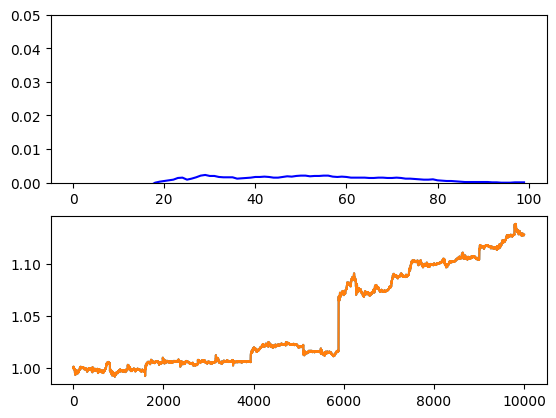

In [ ]:
y_pred_binary = (y_pred >= (y_pred.min() + step*0))
price_changes = []
for el in val.take(313):
  price_changes.append((el[1][1]).numpy())

price_changes = np.concatenate(np.array(price_changes))
print(price_changes[-1] - price_changes[0])

ans = pnl_curve_tensorflow(y_pred_binary,price_changes*stonk_std[1])

fig, axs = plt.subplots(2)
axs[0].plot(accuracy_list,color  = 'b')
#ax.plot(accuracy_all, color = 'g')
axs[0].set_ylim(0.0,0.05)
axs[1].plot(ans[1].numpy())
axs[1].plot(ans[3].numpy())
print(ans[1])

313/313 [==============================] - 38s 120ms/step


(0.0, 0.05)

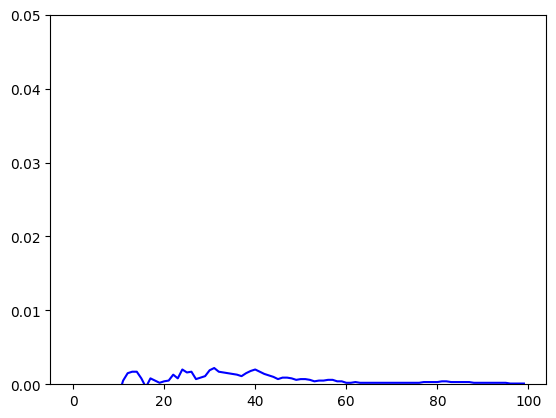

In [ ]:
results = stonk_classifier.evaluate(val)
loss = results[0]
auc = results[3]
accuracy = results[4]
precision = results[5]
y_pred = stonk_classifier.predict(val)[0]
y = np.concatenate([y[0] for x, y in val], axis=0)
int_steps = 100
step = (y_pred.max()-y_pred.min())/int_steps
accuracy_list = np.zeros(int_steps)
baseline_acc = np.max([y.sum()/(val_size),1 - (y.sum()/(val_size))])
for t in range(int_steps):
  y_pred_binary = (y_pred > (y_pred.min() + step*t))
  c = confusion_matrix(y,y_pred_binary)/(val_size)
  accuracy_list[t] = c[0,0]+c[1,1]
accuracy_list = accuracy_list-baseline_acc
max_accuracy_diff = np.amax(accuracy_list)
fig, ax = plt.subplots()
ax.plot(accuracy_list,color  = 'b')
#ax.plot(accuracy_all, color = 'g')
ax.set_ylim(0.0,0.05)

# wandb.log({'auc': auc,'accuracy': accuracy, 'acc_list': accuracy_list,'max_diff':max_accuracy_diff})
# # Close the W&B run.
# wandb.finish()


In [ ]:
sns.distplot(y_pred)

In [ ]:
y_pred_binary = (y_pred > (y_pred.min() + step*50))

In [ ]:
y_pred = stonk_classifier.predict(val)[0]
y = np.concatenate([y[0] for x, y in val], axis=0)
int_steps = 100
step = (y_pred.max()-y_pred.min())/int_steps
y_pred_binary = (y_pred > (y_pred.min() + step*50))

In [ ]:
price_changes = []
for el in val.take(313):
  price_changes.append((el[1][1]).numpy())


In [ ]:
price_changes = np.concatenate(np.array(price_changes))

In [ ]:
ans = pnl_curve_tensorflow(y_pred_binary,price_changes*stonk_std[1])

In [ ]:
for el in val.take(1):
  print(el)

In [ ]:
plt.plot(ans[1].numpy())
plt.plot(ans[3].numpy())

In [ ]:
ans[1]

313/313 [==============================] - 39s 125ms/step


accuracy,▁
auc,▁
dense_1_accuracy,▂▅▇█▁▅▇█▁▅▇█▃▅██▂▅▇█▁▅▇█▁▅██▃▅██▂▅██▂▅▇█
dense_1_auc_1,▁▂▄▃▁▂▄▄▃▂▃▄█▃▄▄▂▂▅▄▂▃▄▄▂▃▅▄▃▄▅▄▃▃▅▅▂▄▅▅
dense_1_loss,▅▃▂▂▆▃▂▂█▃▂▂▁▃▂▂▅▃▂▂▆▃▂▂▃▃▂▂▄▃▂▂▅▃▂▂▆▃▂▂
dense_1_precision_1,█▇▇▇█▇▇▇█▇▇▇▁▇▇▇█▇▇▇█▇▇▇█▇▇▇████████████
dense_accuracy,▁▄▇▇▁▄▇▇▂▄▇█▆▅▇█▂▅▇█▂▅▇█▂▅██▃▅██▂▅▇█▃▅▇█
dense_auc,▂▂▃▂▂▂▃▂▂▂▂▂█▂▃▂▁▂▃▂▁▂▃▂▁▂▃▃▂▂▃▃▂▂▃▃▂▂▃▃
dense_loss,█▅▃▂█▅▃▂█▅▃▂▁▄▂▂▇▅▂▂█▅▂▁█▅▂▁▆▄▁▁▇▄▂▁▆▄▂▁
dense_precision,▇▇▇▆▇▇▇▆█▇▇▇▁▇▇▇▇▇▇▇█▇▇▇▇▇▇▇█▇▇▇▇▇▇▇█▇▇▇
epoch,▁▂▃▃▄▅▆▆▇█


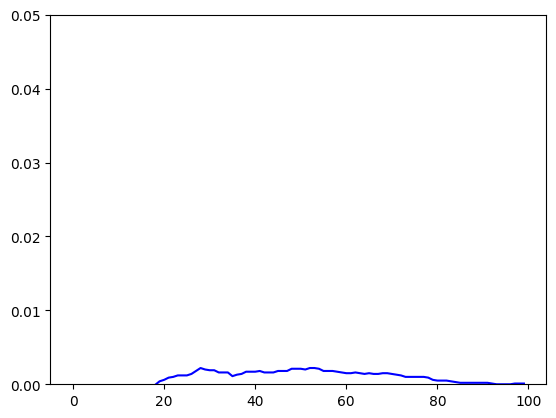

In [ ]:
results = stonk_classifier.evaluate(val)
loss = results[0]
auc = results[3]
accuracy = results[4]
precision = results[5]
y_pred = stonk_classifier.predict(val)[0]
y = np.concatenate([y[0] for x, y in val], axis=0)
int_steps = 100
step = (y_pred.max()-y_pred.min())/int_steps
accuracy_list = np.zeros(int_steps)
baseline_acc = np.max([y.sum()/(val_size),1 - (y.sum()/(val_size))])
for t in range(int_steps):
  y_pred_binary = (y_pred > (y_pred.min() + step*t))
  c = confusion_matrix(y,y_pred_binary)/(val_size)
  accuracy_list[t] = c[0,0]+c[1,1]
accuracy_list = accuracy_list-baseline_acc
max_accuracy_diff = np.amax(accuracy_list)
fig, ax = plt.subplots()
ax.plot(accuracy_list,color  = 'b')
#ax.plot(accuracy_all, color = 'g')
ax.set_ylim(0.0,0.05)
wandb.log({'auc': auc,'accuracy': accuracy, 'acc_list': accuracy_list,'max_diff':max_accuracy_diff})


# Close the W&B run.
wandb.finish()


In [ ]:
stonk_classifier.evaluate(val)

313/313 [==============================] - 42s 134ms/step - loss: 0.5815 - dense_loss: 0.5815 - dense_1_loss: 0.2729 - dense_auc: 0.5531 - dense_accuracy: 0.7294 - dense_precision: 0.0000e+00 - dense_1_auc_1: 0.5781 - dense_1_accuracy: 0.4782 - dense_1_precision_1: 0.0000e+00


[0.5815239548683167,
 0.5815239548683167,
 0.27288246154785156,
 0.5530992746353149,
 0.7293999791145325,
 0.0,
 0.5781114101409912,
 0.4781999886035919,
 0.0]

In [ ]:
stonk_classifier = tf.keras.models.load_model('/content/drive/MyDrive/Stonks/models/stonk_classifier_base_100000.h5')
#stonk_classifier_all = tf.keras.models.load_model('/content/drive/MyDrive/Stonks/models/stonk_classifier_all.h5')

In [ ]:
y_pred = stonk_classifier.predict(val)
#y_pred_all = stonk_classifier_all.predict(val)

313/313 [==============================] - 46s 132ms/step


<ipython-input-21-5800731942ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred[:,0])


<Axes: ylabel='Density'>

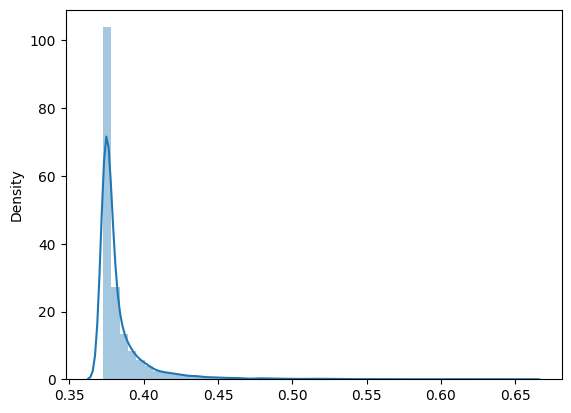

In [ ]:
sns.distplot(y_pred[:,0])
#sns.distplot(y_pred_all[:,0])

In [ ]:
y = np.concatenate([y for x, y in val], axis=0)

In [ ]:
int_steps = 100
step = (y_pred.max()-y_pred.min())/int_steps
#step_all = (y_pred_all.max()-y_pred_all.min())/int_steps
accuracy = np.zeros(int_steps)
#accuracy_all = np.zeros(int_steps)
baseline_acc = np.max([y.sum()/((config.ntrain)//10),1 - (y.sum()/((config.ntrain)//10))])
for t in range(int_steps):
  y_pred_binary = (y_pred > (y_pred.min() + step*t))
  c = confusion_matrix(y,y_pred_binary)/((config.ntrain)//10)
  accuracy[t] = c[0,0]+c[1,1]
accuracy = accuracy - baseline_acc
  # y_pred_all_binary = (y_pred_all > (y_pred_all.min() + step_all*t))
  # c_all = confusion_matrix(y,y_pred_all_binary)/(10000)
  # accuracy_all[t] = c_all[0,0]+c_all[1,1]

(0.0, 0.05)

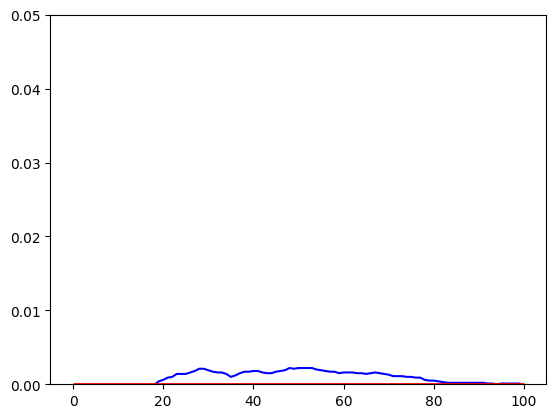

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,color  = 'b')
#ax.plot(accuracy_all, color = 'g')
ax.set_ylim(0.0,0.05)

In [ ]:
accuracy

array([-4.58700000e-01, -1.22900000e-01, -5.15000000e-02, -3.04000000e-02,
       -1.93000000e-02, -1.38000000e-02, -1.23000000e-02, -9.70000000e-03,
       -6.90000000e-03, -6.10000000e-03, -6.40000000e-03, -5.20000000e-03,
       -4.10000000e-03, -2.60000000e-03, -2.20000000e-03, -1.00000000e-03,
       -1.00000000e-03, -6.00000000e-04, -1.00000000e-04,  4.00000000e-04,
        6.00000000e-04,  9.00000000e-04,  1.00000000e-03,  1.40000000e-03,
        1.40000000e-03,  1.40000000e-03,  1.60000000e-03,  1.80000000e-03,
        2.10000000e-03,  2.10000000e-03,  1.90000000e-03,  1.70000000e-03,
        1.60000000e-03,  1.60000000e-03,  1.40000000e-03,  1.00000000e-03,
        1.20000000e-03,  1.50000000e-03,  1.70000000e-03,  1.70000000e-03,
        1.80000000e-03,  1.80000000e-03,  1.60000000e-03,  1.50000000e-03,
        1.50000000e-03,  1.70000000e-03,  1.80000000e-03,  1.90000000e-03,
        2.20000000e-03,  2.10000000e-03,  2.20000000e-03,  2.20000000e-03,
        2.20000000e-03,  

In [ ]:
accuracy = accuracy - baseline_acc

In [ ]:
accuracy

array([-4.58700000e-01, -1.22900000e-01, -5.15000000e-02, -3.04000000e-02,
       -1.93000000e-02, -1.38000000e-02, -1.23000000e-02, -9.70000000e-03,
       -6.90000000e-03, -6.10000000e-03, -6.40000000e-03, -5.20000000e-03,
       -4.10000000e-03, -2.60000000e-03, -2.20000000e-03, -1.00000000e-03,
       -1.00000000e-03, -6.00000000e-04, -1.00000000e-04,  4.00000000e-04,
        6.00000000e-04,  9.00000000e-04,  1.00000000e-03,  1.40000000e-03,
        1.40000000e-03,  1.40000000e-03,  1.60000000e-03,  1.80000000e-03,
        2.10000000e-03,  2.10000000e-03,  1.90000000e-03,  1.70000000e-03,
        1.60000000e-03,  1.60000000e-03,  1.40000000e-03,  1.00000000e-03,
        1.20000000e-03,  1.50000000e-03,  1.70000000e-03,  1.70000000e-03,
        1.80000000e-03,  1.80000000e-03,  1.60000000e-03,  1.50000000e-03,
        1.50000000e-03,  1.70000000e-03,  1.80000000e-03,  1.90000000e-03,
        2.20000000e-03,  2.10000000e-03,  2.20000000e-03,  2.20000000e-03,
        2.20000000e-03,  

**bold text**# To Do List

1.   Code in returns (and sharpe ratio) instead of just accuracy (use separate val dataset)
2.   Try smaller datasets
3.   Backtesting framework
4.   Monte - Carlo sampling (to validate the strategy)
5.   Try other datasets
6.   Change the initialization for training from scratch ('He Normal')
7.   Choose a baseline (SPY)


